### 1. 初始化簇中心

In [1]:
import numpy as np
import random
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

np.random.seed(55)  # 10


def InitCentroids(X, K):
    n = np.size(X, 0)
    rands_index = np.array(random.sample(range(1, n), K))
    centriod = X[rands_index, :]
    return centriod

### 2. 寻找最近簇中心

In [3]:
def findClostestCentroids(X, centroid):
    idx = np.zeros((np.size(X, 0)), dtype=int)
    n = X.shape[0]  # n 表示样本个数
    for i in range(n):
        subs = centroid - X[i, :]
        dimension2 = np.power(subs, 2)
        dimension_s = np.sum(dimension2, axis=1)  # sum of each row
        dimension_s = np.nan_to_num(dimension_s)
        idx[i] = np.where(dimension_s == dimension_s.min())[0][0]
    return idx

### 3. 更新簇中心

In [4]:
def computeCentroids(X, idx, K):
    n, m = X.shape
    centriod = np.zeros((K, m), dtype=float)
    for k in range(K):
        index = np.where(idx == k)[0]  # 一个簇一个簇的分开来计算
        temp = X[index, :]  # ? by m # 每次先取出一个簇中的所有样本
        s = np.sum(temp, axis=0)
        centriod[k, :] = s / np.size(index)
    return centriod

### 4. 构造数据集

In [5]:
def make_data():
    centers = [[2.2, 1], [3.8, 1], [3, 2.8]]  # 指定簇中心
    x, y = make_blobs(n_samples=900, centers=centers, cluster_std=0.35, random_state=200)
    return x, y

### 5. 可视化聚类过程

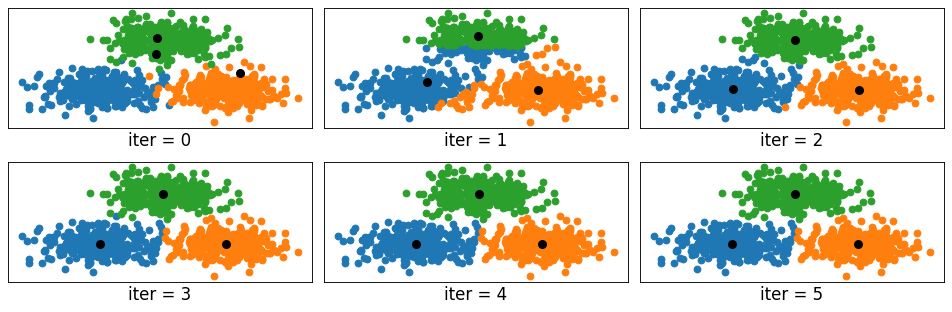

In [6]:
def kmeans(X, idx, K):
    plt.figure(figsize=(12, 4), dpi=80)
    centroids = InitCentroids(X, K)
    fig_idx = 1
    row, col = 2, 3
    step = 1
    for i in range(row * col * step):
        if i % step == 0:
            index_c0, index_c1, index_c2 = (idx == 0), (idx == 1), (idx == 2)
            c0, c1, c2 = X[index_c0], X[index_c1], X[index_c2]
            plt.subplot(row, col, fig_idx)
            plt.scatter(c0[:, 0], c0[:, 1])
            plt.scatter(c1[:, 0], c1[:, 1])
            plt.scatter(c2[:, 0], c2[:, 1])
            plt.scatter(centroids[0, 0], centroids[0, 1], c='black', s=50)
            plt.scatter(centroids[1, 0], centroids[1, 1], c='black', s=50)
            plt.scatter(centroids[2, 0], centroids[2, 1], c='black', s=50)
            plt.xlabel("iter = {}".format(fig_idx - 1), fontsize=15)
            fig_idx += 1
            plt.xticks([])
            plt.yticks([])
        idx = findClostestCentroids(X, centroids)
        centroids = computeCentroids(X, idx, K)
    plt.tight_layout()
    plt.show()


if __name__ == '__main__':
    x, y = make_data()
    kmeans(x, y, 3)
